In [102]:
# étape 1:Import des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from pandas.plotting import scatter_matrix
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [103]:
#étape 2: Charger des données
data=pd.read_csv("C:/dataset/insurance.csv")

In [104]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [105]:
#étape 3:preparation des donnees

In [106]:
#3.a)traiter les valeur manquantes
null_counts = data.isnull().sum()
print(null_counts)

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


'Remarque: On voit qu’il y a aucune valeurs nulles '

In [107]:
#3.b)Le traitement des valeurs dupliquées
print(data.duplicated().sum())


1


In [108]:
data = data.drop_duplicates()
print(data.duplicated().sum())


0


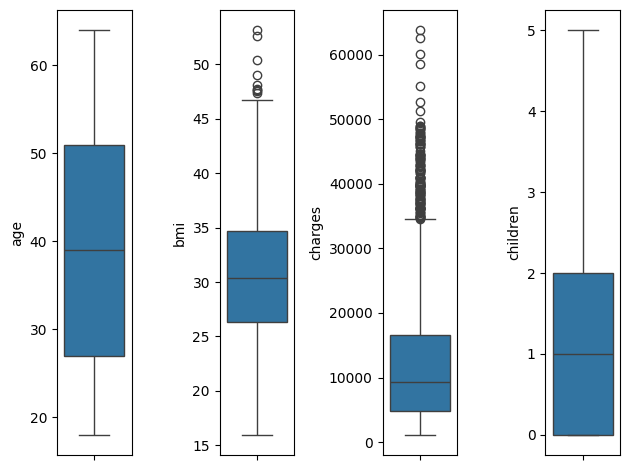

In [109]:
#3.c)Traitement des valeurs aberrantes (Outliers)
f, axes=plt.subplots(1,4)
sns.boxplot(y='age', data=data, ax=axes[0])
sns.boxplot(y='bmi', data=data, ax=axes[1])
sns.boxplot(y='charges', data=data, ax=axes[2])
sns.boxplot(y='children', data=data, ax=axes[3])
plt.tight_layout()

#remarque:il ya des  valeurs aberrantes (Outliers) pour colonne bmi et charges

In [110]:
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour les outliers
lower_bound = Q1 - 0.4* IQR
upper_bound = Q3 + 0.4 * IQR

# Filtrage des outliers
data= data[(data['bmi'] >= lower_bound) & (data['bmi'] <= upper_bound)]

print(data)

      age     sex    bmi  children smoker     region     charges
0      19  female  27.90         0    yes  southwest  16884.9240
1      18    male  33.77         1     no  southeast   1725.5523
2      28    male  33.00         3     no  southeast   4449.4620
4      32    male  28.88         0     no  northwest   3866.8552
5      31  female  25.74         0     no  southeast   3756.6216
...   ...     ...    ...       ...    ...        ...         ...
1333   50    male  30.97         3     no  northwest  10600.5483
1334   18  female  31.92         0     no  northeast   2205.9808
1335   18  female  36.85         0     no  southeast   1629.8335
1336   21  female  25.80         0     no  southwest   2007.9450
1337   61  female  29.07         0    yes  northwest  29141.3603

[1052 rows x 7 columns]


In [111]:
Q1 = data['charges'].quantile(0.25)
Q3 = data['charges'].quantile(0.75)
IQR = Q3 - Q1

# Définition des bornes pour les outliers
lower_bound = Q1 - 0.4 * IQR
upper_bound = Q3 + 0.4 * IQR

# Filtrage des outliers
data= data[(data['charges'] >= lower_bound) & (data['charges'] <= upper_bound)]

print(data)

      age     sex    bmi  children smoker     region      charges
0      19  female  27.90         0    yes  southwest  16884.92400
1      18    male  33.77         1     no  southeast   1725.55230
2      28    male  33.00         3     no  southeast   4449.46200
4      32    male  28.88         0     no  northwest   3866.85520
5      31  female  25.74         0     no  southeast   3756.62160
...   ...     ...    ...       ...    ...        ...          ...
1331   23  female  33.40         0     no  southwest  10795.93733
1333   50    male  30.97         3     no  northwest  10600.54830
1334   18  female  31.92         0     no  northeast   2205.98080
1335   18  female  36.85         0     no  southeast   1629.83350
1336   21  female  25.80         0     no  southwest   2007.94500

[860 rows x 7 columns]


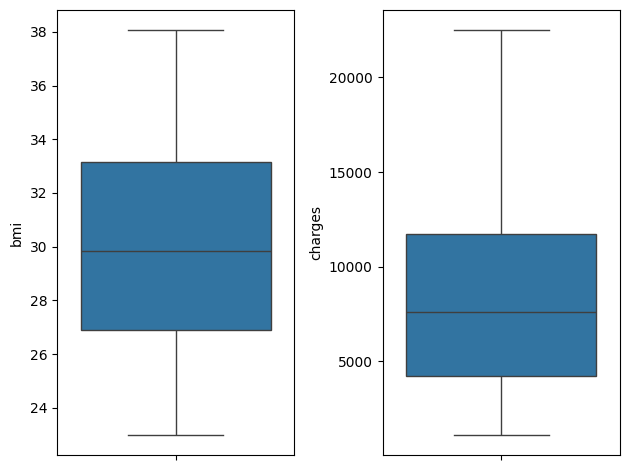

In [112]:
f, axes=plt.subplots(1,2)
sns.boxplot(y='bmi', data=data, ax=axes[0])
sns.boxplot(y='charges', data=data, ax=axes[1])
plt.tight_layout()

In [113]:
#3.d:Encodage des valeurs catégoriques vers numérique

In [114]:
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])
data['region'] = le.fit_transform(data['region'])
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.92400
1,18,1,33.77,1,0,2,1725.55230
2,28,1,33.00,3,0,2,4449.46200
4,32,1,28.88,0,0,1,3866.85520
5,31,0,25.74,0,0,2,3756.62160
...,...,...,...,...,...,...,...
1331,23,0,33.40,0,0,3,10795.93733
1333,50,1,30.97,3,0,1,10600.54830
1334,18,0,31.92,0,0,0,2205.98080
1335,18,0,36.85,0,0,2,1629.83350


In [115]:
#étape 4 (Data Visualisation)

In [116]:
#afficher les dernières lignes de data set
data.tail()

,age,sex,bmi,children,smoker,region,charges
1331,23,0,33.40,0,0,3,10795.93733
1333,50,1,30.97,3,0,1,10600.54830
1334,18,0,31.92,0,0,0,2205.98080
1335,18,0,36.85,0,0,2,1629.83350
1336,21,0,25.80,0,0,3,2007.94500


In [117]:
#afficher les premières lignes
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.90,0,1,3,16884.9240
1,18,1,33.77,1,0,2,1725.5523
2,28,1,33.00,3,0,2,4449.4620
4,32,1,28.88,0,0,1,3866.8552
5,31,0,25.74,0,0,2,3756.6216


In [118]:
#afficher les Informations sur les types de données et les valeurs manquantes 
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 860 entries, 0 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       860 non-null    int64  
 1   sex       860 non-null    int32  
 2   bmi       860 non-null    float64
 3   children  860 non-null    int64  
 4   smoker    860 non-null    int32  
 5   region    860 non-null    int32  
 6   charges   860 non-null    float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 43.7 KB


In [119]:
#Statistiques descriptives :
data.describe()

,age,sex,bmi,children,smoker,region,charges
count,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000,860.000000
mean,38.639535,0.491860,30.048529,1.105814,0.073256,1.532558,8492.440043
std,13.651502,0.500225,3.950011,1.233681,0.260708,1.109850,5291.822479
min,18.000000,0.000000,22.990000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.885000,0.000000,0.000000,1.000000,4236.576662
50%,39.000000,0.000000,29.830000,1.000000,0.000000,2.000000,7636.569025
75%,50.000000,1.000000,33.155000,2.000000,0.000000,3.000000,11743.457775
max,64.000000,1.000000,38.060000,5.000000,1.000000,3.000000,22493.659640


In [120]:
# Feature Importance (FI)

In [121]:
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]  # Features
y = data['charges'] 

model = ExtraTreesRegressor()
model.fit(X, y)

# Affichage de l'importance des caractéristiques
importances = model.feature_importances_
importance_dict = {X.columns[i]: imp for i, imp in enumerate(importances)}
print("Feature Importance:", importance_dict)


Feature Importance: {'age': 0.45128772129157496, 'sex': 0.018594755136013514, 'bmi': 0.1019864408407799, 'children': 0.05324576364401594, 'smoker': 0.329474033010438, 'region': 0.04541128607717775}


In [122]:
#Afficher la nuage des points

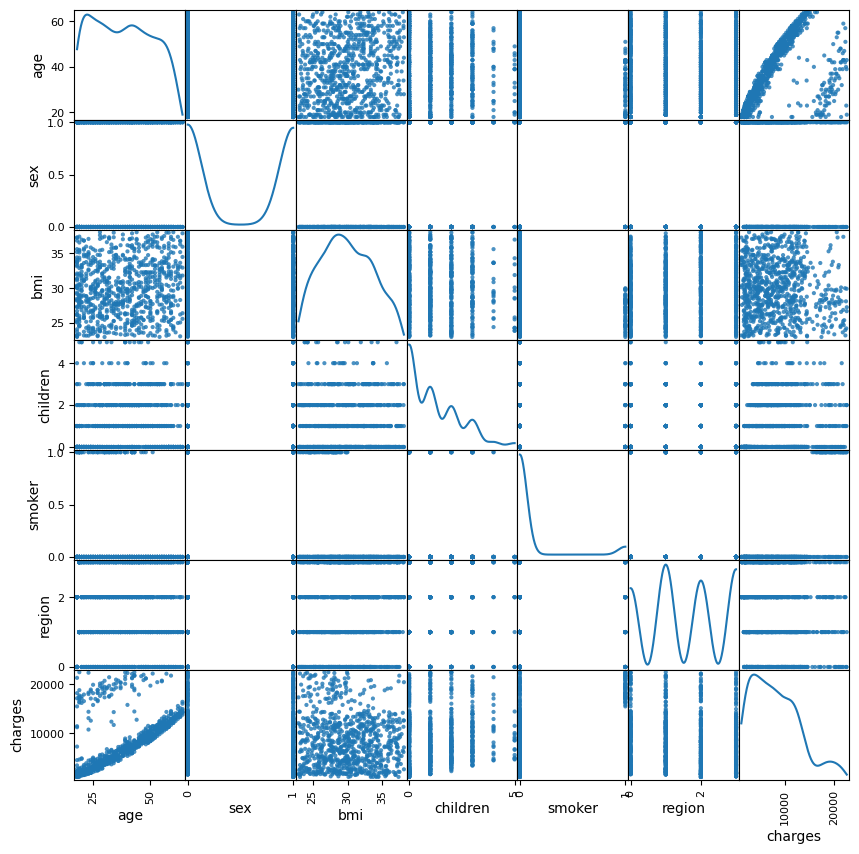

In [123]:
features = data[['age','sex' ,'bmi', 'children','smoker','region','charges']]
scatter_matrix(features, alpha=0.8, figsize=(10, 10), diagonal='kde')
plt.show()

In [124]:
#étape 5 :Division data en 2 data sets :traitement *08% et test 20%

In [125]:
X = data[['age','bmi','smoker']].values
Y = data['charges'].values
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(688, 3)
(172, 3)
(688,)
(172,)


In [126]:
#étape 6:entraîner le modèle

In [127]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [128]:
#étape 7:Prédiction sur les données de test

In [129]:
y_pred = regressor.predict(X_test)
y_pred

array([ 3911.56768399, 12163.82113526,  9408.97518572,  2823.13656053,
        3817.2592745 ,  9191.00843822,  2489.08147969,  3623.94984337,
       11998.25748304,  8123.1534485 ,  2351.97580366,  6052.02065946,
       10939.66788092, 10561.1010817 , 18180.73005966,  9536.26396298,
       12871.92062376,  4117.78247642,  7690.86946166, 10033.84687196,
       10806.91437589,  2766.33091037,  3120.85182273,  4938.83145184,
       11433.2799095 ,  2606.44305594,  3775.94632089, 13048.57441765,
        4104.98741735,  3432.51555021,  2871.11803203, 11878.18873484,
        2382.19861559,  2491.17722212, 15947.78389433, 11656.53162975,
        8123.92556414,  2344.4752518 ,  6819.4123656 ,  4417.8644694 ,
        2555.81433085,  5201.4106855 ,  3852.004478  ,  3757.4155457 ,
       10773.16189249,  5576.11690655,  7462.59422256, 13867.74825512,
       12299.44249835,  7512.23022756,  3550.48855598,  8422.02211692,
        4734.71240185,  8505.85181425,  3001.9963991 , 20099.36524391,
      

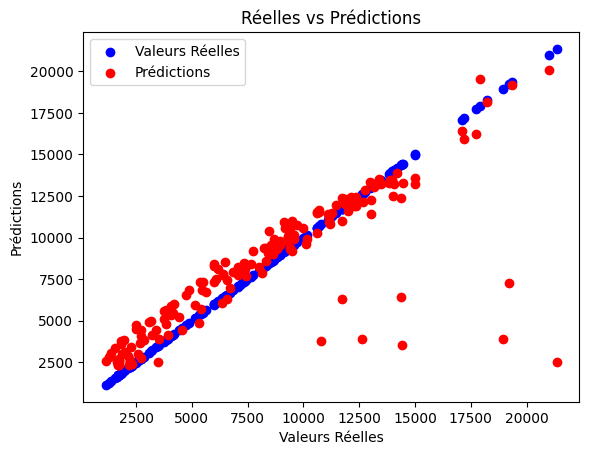

In [135]:
# Création du graphique
plt.scatter(Y_test, Y_test, color='blue', label='Valeurs Réelles')  # Points pour les valeurs réelles
plt.scatter(Y_test, y_pred, color='red', label='Prédictions')  # Points pour les prédictions
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Réelles vs Prédictions')
plt.legend()
plt.show()

In [131]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})
df1 = df.head(25)
print(df1)

         Actual     Predicted
0    3537.70300   3911.567684
1   12646.20700  12163.821135
2    8539.67100   9408.975186
3    1261.85900   2823.136561
4    2842.76075   3817.259274
5    7731.85785   9191.008438
6    2203.73595   2489.081480
7    1815.87590   3623.949843
8   11840.77505  11998.257483
9    6186.12700   8123.153449
10   2201.09710   2351.975804
11   6334.34355   6052.020659
12  11150.78000  10939.667881
13   9174.13565  10561.101082
14  18246.49550  18180.730060
15   8547.69130   9536.263963
16  12741.16745  12871.920624
17   3906.12700   4117.782476
18   7418.52200   7690.869462
19   9288.02670  10033.846872
20  11187.65670  10806.914376
21   2719.27975   2766.330910
22   2007.94500   3120.851823
23   3062.50825   4938.831452
24  11082.57720  11433.279909


In [132]:
#étape 8:Évaluer le modèle

In [133]:
print('La performance du modèle sur la base dapprentissage')
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

La performance du modèle sur la base dapprentissage
Mean Absolute Error: 1348.6295945645788
Mean Squared Error: 7277241.235054895
Root Mean Squared Error: 2697.6362310465242
